Related third party imports

In [1]:
import matplotlib.pyplot as plt

from numpy import arange, array, dot
from numpy import linalg as LA

Variaveis globais

In [2]:
plt.rcParams['xtick.labelsize'] = 22
plt.rcParams['ytick.labelsize'] = 22
plt.rcParams['axes.labelsize'] = 26
plt.rcParams['axes.titlesize'] = 30

a = .0        # Inicio do intervalo da variavel independente 
b = 20.       # Final do intervalo da variavel independente
h = 2e-2      # Tamanho inicial de um passo de integracao

Constantes

In [3]:
M, K, G, L0 = .02, .9, 9.8, .2
VERSOR_x = array([1.,.0,.0])
VERSOR_Y = array([.0,1.,.0])
VERSOR_Z = array([.0,.0,1.])

# Equacoes de diferenca

In [4]:
def f(r,t):
    l_i = LA.norm(r)
    versor_r = r/l_i
    spring_a = -K*(l_i-L0)/M
    
    fx = spring_a*dot(versor_r,VERSOR_x)
    fy = spring_a*dot(versor_r,VERSOR_Y) -G
    fz = spring_a*dot(versor_r,VERSOR_Z)
    
    return array([fx, fy, fz], float)

In [5]:
def passo_vrl(f,r,v,vpm,t,h):   # Calcula um passo no método de Verlet
    r += h*vpm                  # Calculando a posição no próximo t "inteiro"
    k = h*f(r,t+h)
    v = vpm + 0.5*k             # Calculando a velocidade no próximo t "inteiro"
    vpm += k                    # Calculando a velocidade no próximo t "médio"
    return r, v, vpm            # Retorna os NOVOS VALORES de r, v e vpm

Condicoes iniciais

In [6]:
ra = array([.05,-.25,.0, -.1,-.15,.2],float)
r_vrl, v_vrl = ra[:3], ra[3:]
t = a

t_lista, e_k_lista, e_pl_lista, e_pg_lista, e_lista = [], [], [], [], []

vpm = v_vrl + 0.5*h*f(r_vrl,t)  # Inicializando valores no ponto "médio"
while t<= b:   # Realizando a integração numérica
    e_k = M*dot(v_vrl,v_vrl)/2
    e_pl = K*((LA.norm(r_vrl)-L0)**2)/2
    e_pg = M*G*r_vrl[1]
    
    t_lista.append(t)
    e_k_lista.append(e_k)
    e_pl_lista.append(e_pl)
    e_pg_lista.append(e_pg) 
    e_lista.append(e_k+e_pl+e_pg) 
    r_vrl, v_vrl, vpm = passo_vrl(f,r_vrl,v_vrl,vpm,t,h)
    t += h

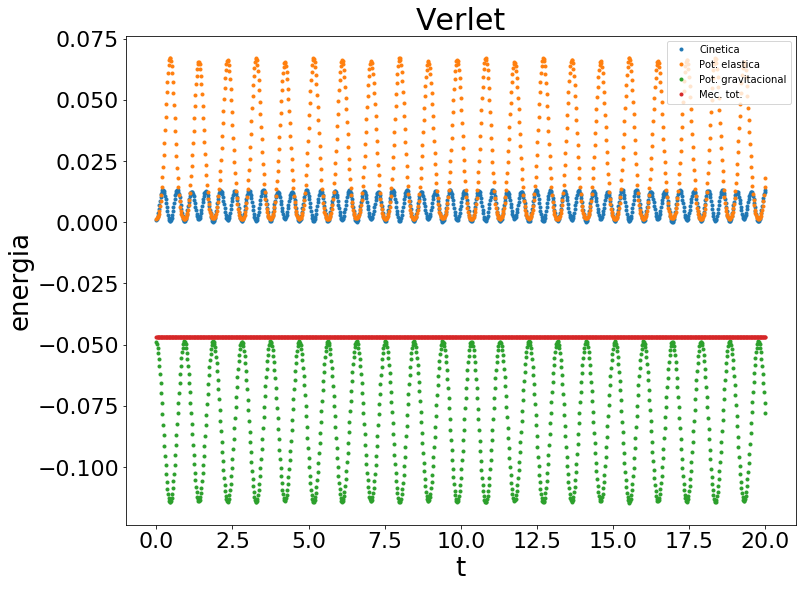

In [8]:
plt.figure(figsize=(12,9))
plt.plot(t_lista, e_k_lista, '.', label='Cinetica')
plt.plot(t_lista, e_pl_lista, '.', label='Pot. elastica')
plt.plot(t_lista, e_pg_lista, '.', label='Pot. gravitacional')
plt.plot(t_lista, e_lista, '.', label='Mec. tot.')
plt.title("Verlet")
plt.xlabel("t")
plt.ylabel("energia")
plt.legend(loc='upper right')
plt.show()

In [21]:
e_dict = {10**i: [] for i in range(-4,-1)}
t_dict = {10**i: [] for i in range(-4,-1)}

for h in [10**i for i in range(-4,-1)]:
    ra = array([.05,-.25,.0, -.1,-.15,.2],float)
    r_vrl, v_vrl = ra[:3], ra[3:]
    t = a

    vpm = v_vrl + 0.5*h*f(r_vrl,t)  # Inicializando valores no ponto "médio"
    while t<= b:   # Realizando a integração numérica
        e_k = M*dot(v_vrl,v_vrl)/2
        e_pl = K*((LA.norm(r_vrl)-L0)**2)/2
        e_pg = M*G*r_vrl[1]

        t_dict[h].append(t)
        e_dict[h].append(e_k+e_pl+e_pg) 
        r_vrl, v_vrl, vpm = passo_vrl(f,r_vrl,v_vrl,vpm,t,h)
        t += h

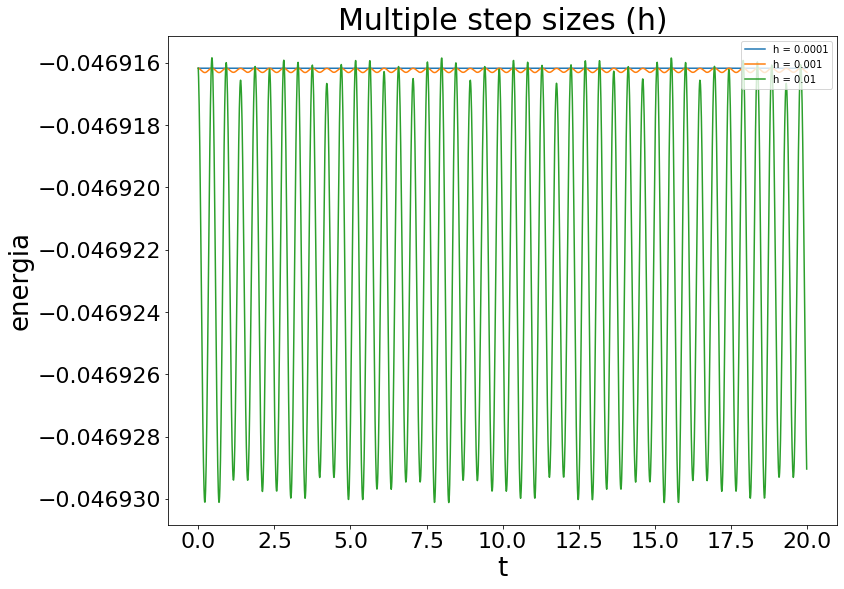

In [22]:
plt.figure(figsize=(12,9))
for k in e_dict.keys():
    plt.plot(t_dict[k], e_dict[k], label=f'h = {k}')
plt.title("Multiple step sizes (h)")
plt.xlabel("t")
plt.ylabel("energia")
plt.legend(loc='upper right')
plt.show()

In [14]:
e_dict

{1e-05: [-0.04691617562233506,
  -0.046916175622335285,
  -0.04691617562233551,
  -0.04691617562233573,
  -0.046916175622335944,
  -0.046916175622336166,
  -0.046916175622336395,
  -0.04691617562233662,
  -0.04691617562233684,
  -0.04691617562233706,
  -0.04691617562233728,
  -0.04691617562233751,
  -0.046916175622337734,
  -0.046916175622337956,
  -0.046916175622338185,
  -0.046916175622338394,
  -0.046916175622338616,
  -0.046916175622338845,
  -0.04691617562233907,
  -0.046916175622339296,
  -0.04691617562233952,
  -0.04691617562233973,
  -0.04691617562233996,
  -0.046916175622340184,
  -0.04691617562234041,
  -0.046916175622340635,
  -0.04691617562234086,
  -0.046916175622341086,
  -0.046916175622341315,
  -0.046916175622341544,
  -0.046916175622341766,
  -0.04691617562234199,
  -0.04691617562234222,
  -0.04691617562234244,
  -0.046916175622342675,
  -0.0469161756223429,
  -0.046916175622343126,
  -0.04691617562234335,
  -0.04691617562234356,
  -0.0469161756223438,
  -0.04691617562